## Lets take a run ot our model and see how it performs. We will set a indicator for the daily returns for SPY between 7.2% and 11%, which is rear but does happen in the mist of economic crisis. This is a perfect time to look that the 08 crash as well as the current COViD-19 epidemic

## Libraries 

In [136]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

## import data
## We will be looking at the adjustable close for both the S&P and VIX

In [137]:
tickers = ["^VIX", "^GSPC","UVXY"]
data = pd.DataFrame()
for t in tickers:
    data[t] = web.DataReader(t, data_source="yahoo", start = "2002-1-1")["Adj Close"]

### plotting visual movement for both VIX and SPY .As expected the plots show an inverse correlation

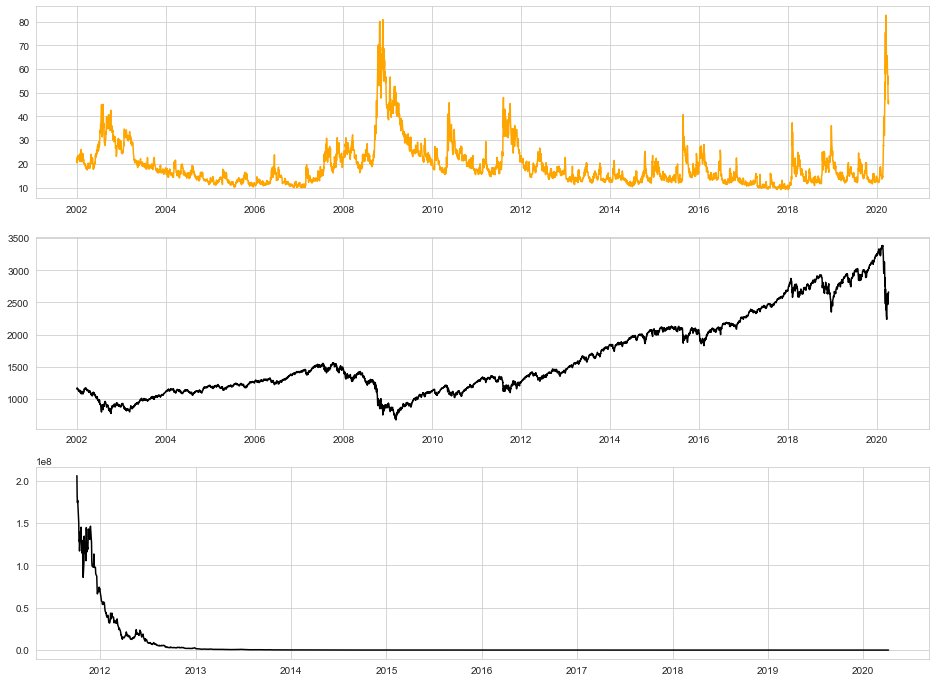

In [138]:
fig, axes = plt.subplots(3,1,figsize = (16,12))
axes[0].plot(data["^VIX"], c = "orange")
axes[1].plot(data["^GSPC"], c = "black")
axes[2].plot(data["UVXY"], c = "black")

### Tracking thre daily returns for each security. We will look at the volitility of the daily returns on a histogram below. what we see is most of the daily returns of SPY between -0.05, and 0.05, where VIX is between -0.2, and .2 with a few outlyers

In [139]:
for t in tickers:
    data[f"{t} daily returns"] = data[f"{t}"].pct_change()

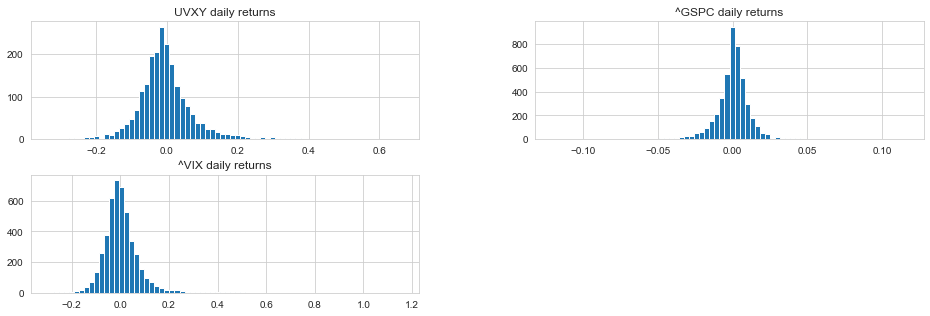

In [140]:
sns.set_style("whitegrid")
data[["^VIX daily returns","^GSPC daily returns", "UVXY daily returns"]].hist(figsize = (16,5), bins = 70);

### The reason for this analysis is the test the theory that as the daily returns of SPY is between 7% and 11%  we can see a sharp increase in VIX. We will test this below but first we will creat a hypithetical portfolio containing both SPY and VIX . We will weigh the portfolio 40% SPY and 60% VIX with a position of 150K in the portfolio. Our other assumption is that we are getting in the market on the first date of 1-3-2006

## Normal Returns

In [141]:
for s in tickers:
    data[f"{s} normal returns"] = data[s]/data[s].iloc[0]

In [142]:
data.head()

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns
Date,,,,,,,,,
2002-01-02,22.709999,1154.670044,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN
2002-01-03,21.340000,1165.270020,NaN,-0.060326,0.009180,NaN,0.939674,1.009180,NaN
2002-01-04,20.450001,1172.510010,NaN,-0.041706,0.006213,NaN,0.900484,1.015450,NaN
2002-01-07,21.940001,1164.890015,NaN,0.072861,-0.006499,NaN,0.966094,1.008851,NaN
2002-01-08,21.830000,1160.709961,NaN,-0.005014,-0.003588,NaN,0.961251,1.005231,NaN


## Allocations

In [143]:
weights = [0.3, 0.5, 0.2]
for s,w in zip(tickers, weights):
    data[f"{s} allocation"] = data[f"{s} normal returns"] * w

In [144]:
data.head()

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns,^VIX allocation,^GSPC allocation,UVXY allocation
Date,,,,,,,,,,,,
2002-01-02,22.709999,1154.670044,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.300000,0.500000,NaN
2002-01-03,21.340000,1165.270020,NaN,-0.060326,0.009180,NaN,0.939674,1.009180,NaN,0.281902,0.504590,NaN
2002-01-04,20.450001,1172.510010,NaN,-0.041706,0.006213,NaN,0.900484,1.015450,NaN,0.270145,0.507725,NaN
2002-01-07,21.940001,1164.890015,NaN,0.072861,-0.006499,NaN,0.966094,1.008851,NaN,0.289828,0.504425,NaN
2002-01-08,21.830000,1160.709961,NaN,-0.005014,-0.003588,NaN,0.961251,1.005231,NaN,0.288375,0.502615,NaN


## Position -> 150K

In [145]:
for x in tickers:
    data[f"{x} position"] = data[f"{x} allocation"] * 150000

In [146]:
data.head()

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns,^VIX allocation,^GSPC allocation,UVXY allocation,^VIX position,^GSPC position,UVXY position
Date,,,,,,,,,,,,,,,
2002-01-02,22.709999,1154.670044,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.300000,0.500000,NaN,45000.000000,75000.000000,NaN
2002-01-03,21.340000,1165.270020,NaN,-0.060326,0.009180,NaN,0.939674,1.009180,NaN,0.281902,0.504590,NaN,42285.338863,75688.506793,NaN
2002-01-04,20.450001,1172.510010,NaN,-0.041706,0.006213,NaN,0.900484,1.015450,NaN,0.270145,0.507725,NaN,40521.799711,76158.770372,NaN
2002-01-07,21.940001,1164.890015,NaN,0.072861,-0.006499,NaN,0.966094,1.008851,NaN,0.289828,0.504425,NaN,43474.243234,75663.824100,NaN
2002-01-08,21.830000,1160.709961,NaN,-0.005014,-0.003588,NaN,0.961251,1.005231,NaN,0.288375,0.502615,NaN,43256.276361,75392.314477,NaN


In [147]:
data.loc["2020-03-16"]

^VIX                        82.690002
^GSPC                     2386.129883
UVXY                        90.139999
^VIX daily returns           0.429881
^GSPC daily returns         -0.119841
UVXY daily returns           0.574773
^VIX normal returns          3.641128
^GSPC normal returns         2.066504
UVXY normal returns               NaN
^VIX allocation              1.092338
^GSPC allocation             1.033252
UVXY allocation                   NaN
^VIX position           163850.737995
^GSPC position          154987.775208
UVXY position                     NaN
Name: 2020-03-16 00:00:00, dtype: float64

## Lets take a run ot our model and see how it performs. We will set a indicator for the daily returns for SPY and 7.2%, which is rear but does happen in the mist of economic crisis. THis is a perfect time to look that the 08 crash as well as the curren COViD-19 epidemic

### We can see there are 4 dates that this occurred and we just missed 2. in 2020

In [148]:
data.columns

Index(['^VIX', '^GSPC', 'UVXY', '^VIX daily returns', '^GSPC daily returns',
       'UVXY daily returns', '^VIX normal returns', '^GSPC normal returns',
       'UVXY normal returns', '^VIX allocation', '^GSPC allocation',
       'UVXY allocation', '^VIX position', '^GSPC position', 'UVXY position'],
      dtype='object')

In [149]:
data[data["^GSPC daily returns"] * 100 > 7.2][["^VIX","^GSPC", '^GSPC daily returns']]

,^VIX,^GSPC,^GSPC daily returns
Date,,,
2008-10-13,54.990002,1003.349976,0.115800
2008-10-28,66.959999,940.510010,0.107890
2020-03-13,57.830002,2711.020020,0.092871
2020-03-24,61.669998,2447.330078,0.093828


In [150]:
data.reset_index().loc[[0,3], ["^GSPC", "^VIX"]]

,^GSPC,^VIX
0,1154.670044,22.709999
3,1164.890015,21.940001


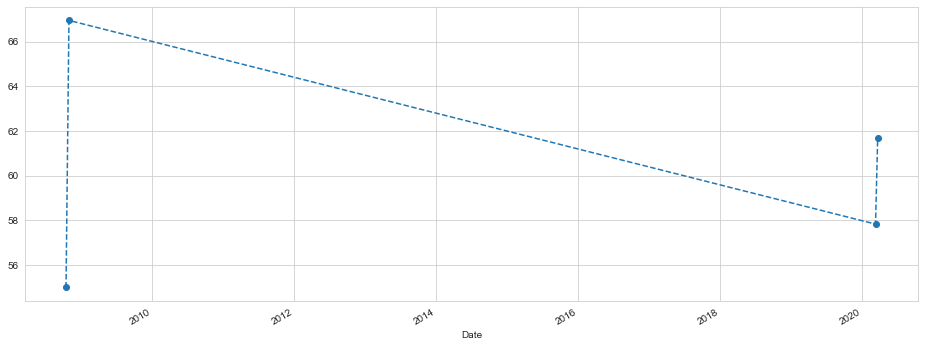

In [151]:
data[(data["^GSPC daily returns"] * 100 > 7.2)]["^VIX"].plot(figsize = (16,6), marker = "o", ls = "--")

## lets take a look at each date where SpY was 7.2 or above. To get a better look at this we will take a few days before and after  the set date

## 2008-10-13

### SPY daily returns up 11.5 %

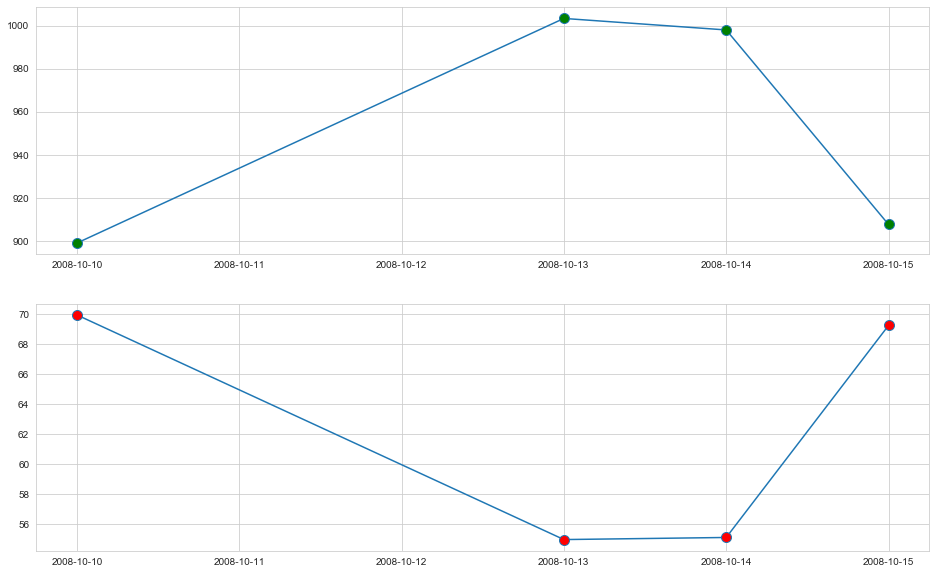

In [152]:
fig, axes = plt.subplots(2,1, figsize = (16,10))
axes[0].plot(data.loc["2008-10-10":"2008-10-15"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-10":"2008-10-15"]["^VIX"], marker = "o", mfc = "r", ms = 10)

### 2008-10-28

### SpY daily returns spike 10.5%

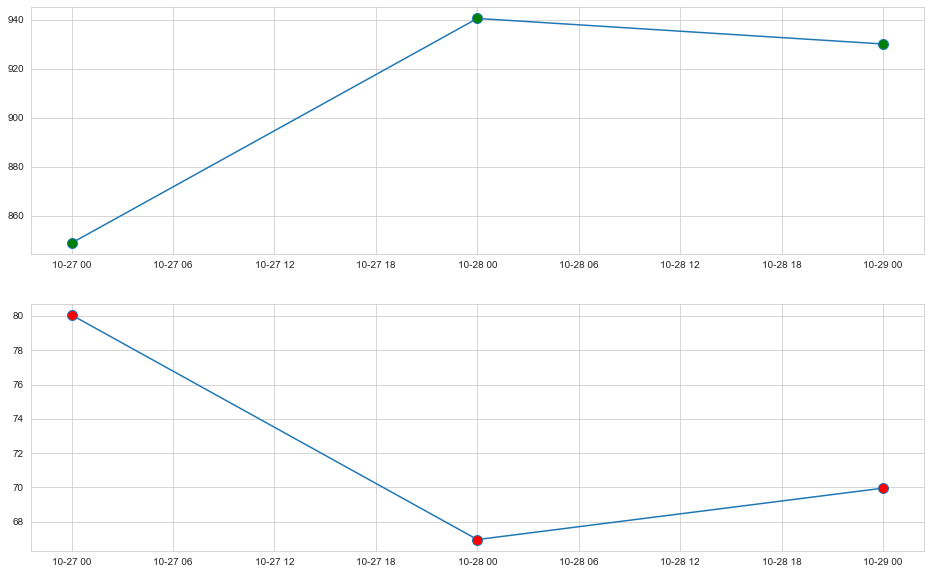

In [153]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-25":"2008-10-29"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-25":"2008-10-29"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2020-03-13

### SPY Daily returns up 9.3%

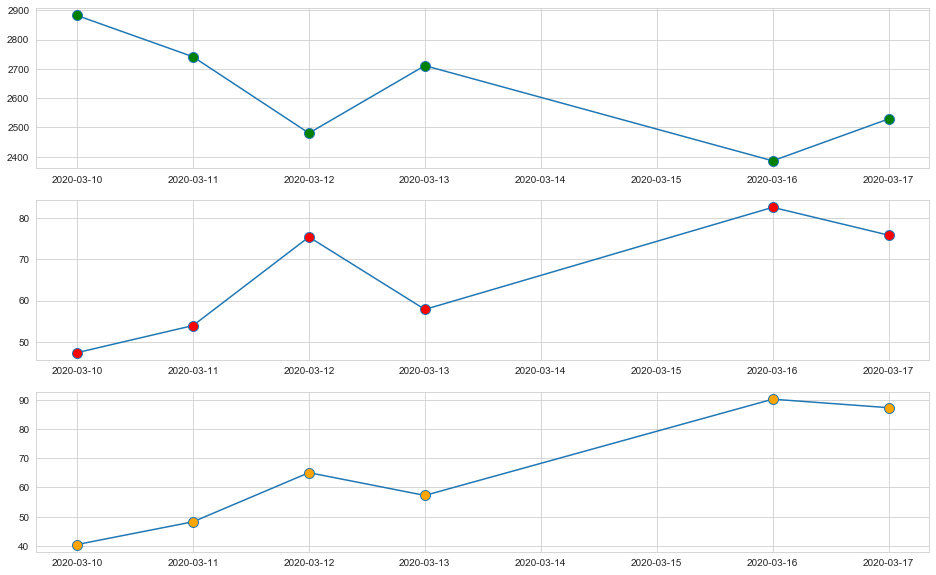

In [154]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-10":"2020-03-17"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-10":"2020-03-17"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-10":"2020-03-17"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

## 2020-03-24


## SPY Daily return up 9.4%

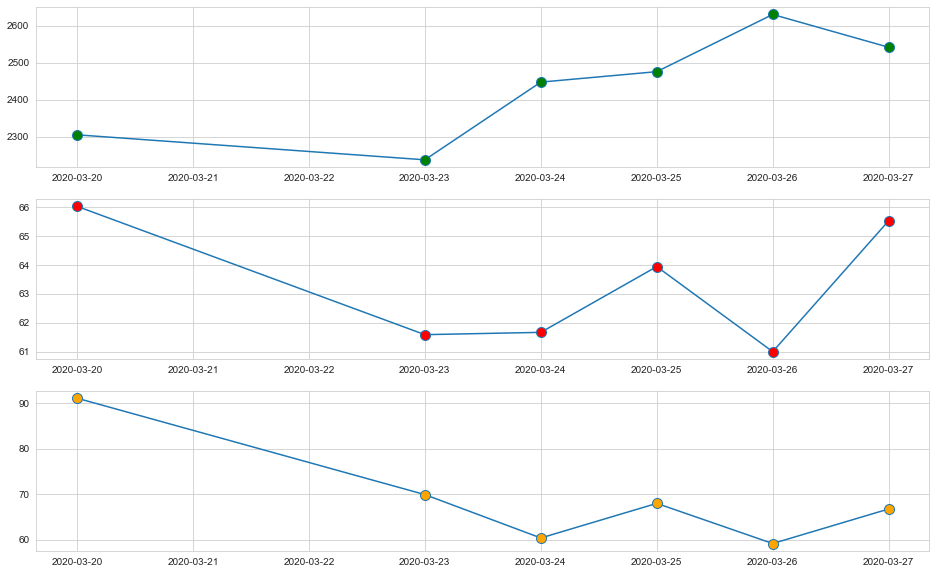

In [177]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-20":"2020-03-27"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-20":"2020-03-27"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-20":"2020-03-27"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

## in summary ad SPY daily returns is in the range of 7.2 and 11 it is almost certain that VIX will have a significant gain. We cna see this clearly in 2020 on the days of 3/13 and 3 /24

### lets take a look at tthe inverse. Since SPY is less likely to jump 7% regularly lets investigate VIX daily returns in relation to S&P

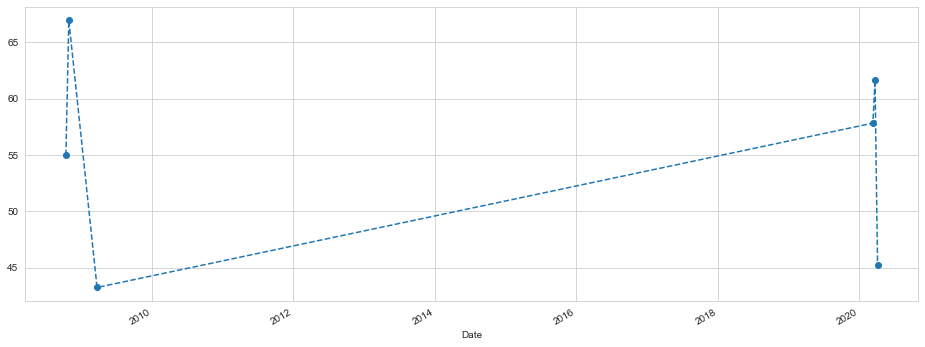

In [156]:
data[(data["^GSPC daily returns"] * 100 > 7)]["^VIX"].plot(figsize = (16,6), marker = "o", ls = "--")

In [157]:
(data["^GSPC daily returns"] * 100).sort_values().head(10)

Date
2020-03-16   -11.984055
2020-03-12    -9.511268
2008-10-15    -9.034978
2008-12-01    -8.929524
2008-09-29    -8.806776
2008-10-09    -7.616710
2020-03-09    -7.596970
2008-11-20    -6.712293
2011-08-08    -6.663446
2008-11-19    -6.115558
Name: ^GSPC daily returns, dtype: float64

## Dates blow where SPY went under -7% daily return

In [158]:
data[data["^GSPC daily returns"] * 100 < -7]["^VIX"].index

DatetimeIndex(['2008-09-29', '2008-10-09', '2008-10-15', '2008-12-01',
               '2020-03-09', '2020-03-12', '2020-03-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [159]:
data.loc["2008-10-09", "^VIX"]

63.91999816894531

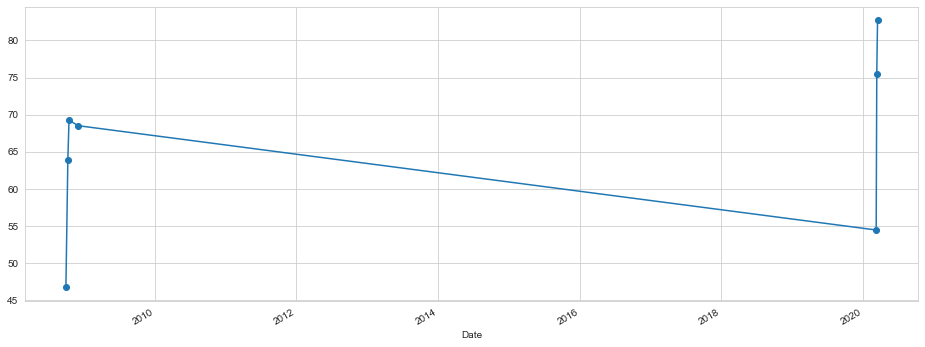

In [160]:
data[data["^GSPC daily returns"] * 100 < -7]["^VIX"].plot(figsize = (16,6), marker = "o")

## GSPC daily under  < -7

### 2008-09-29

## SPY at -8.8 % , with a 3% increase next day as vix drops 15% 

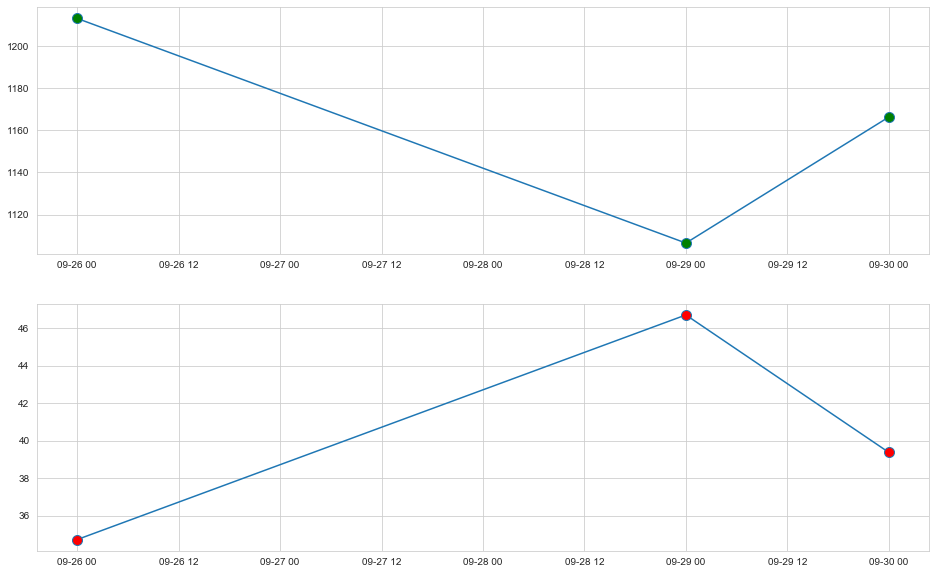

In [161]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-09-26":"2008-09-30"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-09-26":"2008-09-30"]["^VIX"], marker = "o", mfc = "r", ms = 10)

### 2008-10-09

## SPY down 7.6%, insufficient here

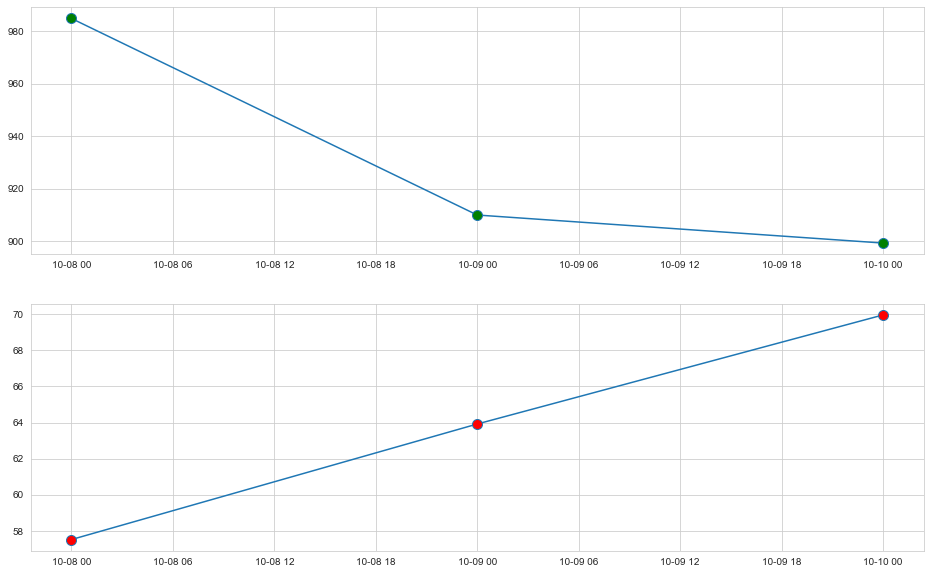

In [162]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-8":"2008-10-11"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-8":"2008-10-11"]["^VIX"], marker = "o", mfc = "r", ms = 10)

### 2008-10-15

## SPY down 9% -> 3.5 %increase in SPY next day with a 3.4 % drop in VIX

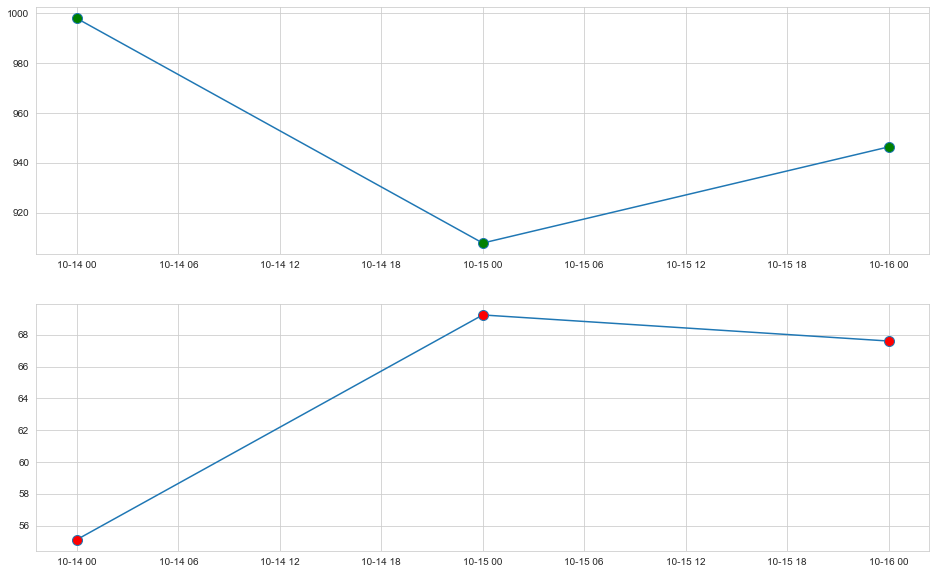

In [163]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-10-14":"2008-10-16"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-10-14":"2008-10-16"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2008-12-01

## SPY down 8.9%- 4% jump in SPY and a 9.5% loss in VIX

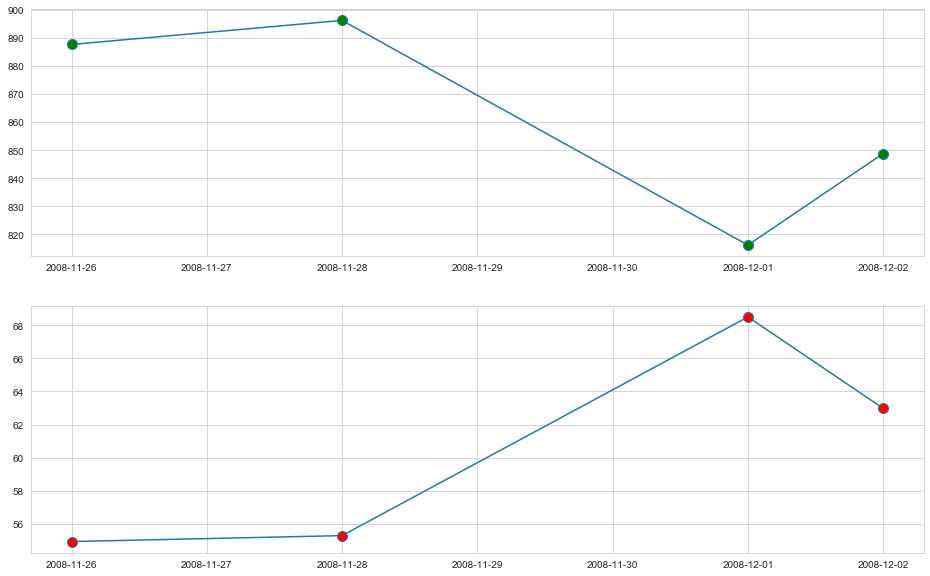

In [164]:
fig, axes = plt.subplots(2,1, figsize = (16,10));
axes[0].plot(data.loc["2008-11-26":"2008-12-02"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2008-11-26":"2008-12-02"]["^VIX"], marker = "o", mfc = "r", ms = 10)

## 2020-03-09

## SPY down 7.6%

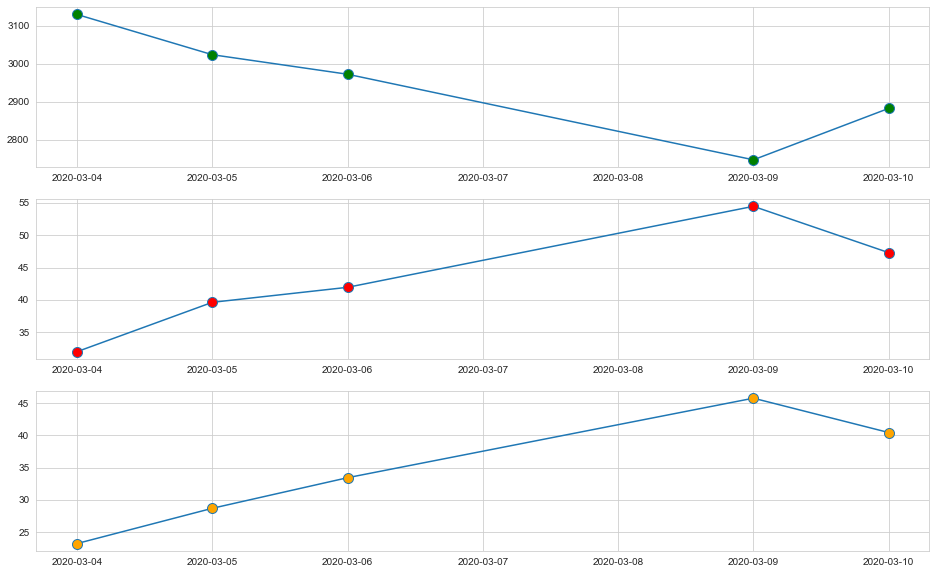

In [165]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-04":"2020-03-10"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-04":"2020-03-10"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-04":"2020-03-10"]["UVXY"], marker = "o", mfc = "orange", ms = 10)


## 2020-03-12 

# Spy down 9.5%

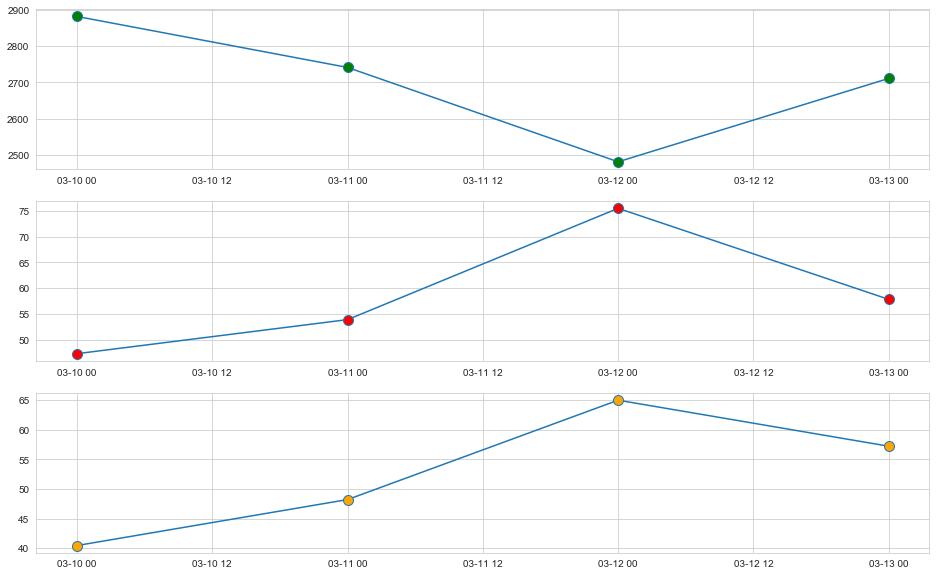

In [166]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-10":"2020-03-14"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-10":"2020-03-14"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-10":"2020-03-14"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

##  2020-03-16

## SPY down 11.9%

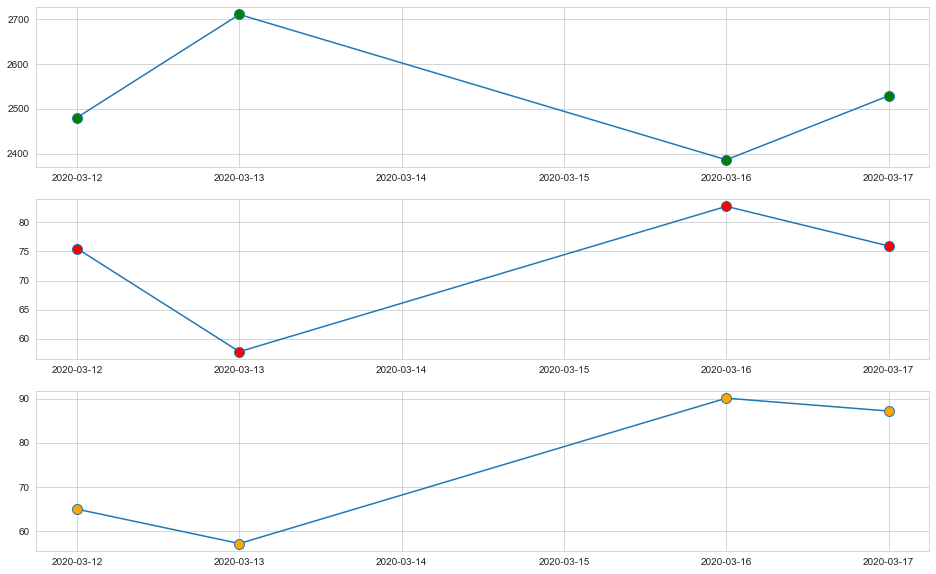

In [167]:
fig, axes = plt.subplots(3,1, figsize = (16,10));
axes[0].plot(data.loc["2020-03-12":"2020-03-17"]["^GSPC"], marker = "o", mfc = "g", ms = 10)
axes[1].plot(data.loc["2020-03-12":"2020-03-17"]["^VIX"], marker = "o", mfc = "r", ms = 10)
axes[2].plot(data.loc["2020-03-12":"2020-03-17"]["UVXY"], marker = "o", mfc = "orange", ms = 10)

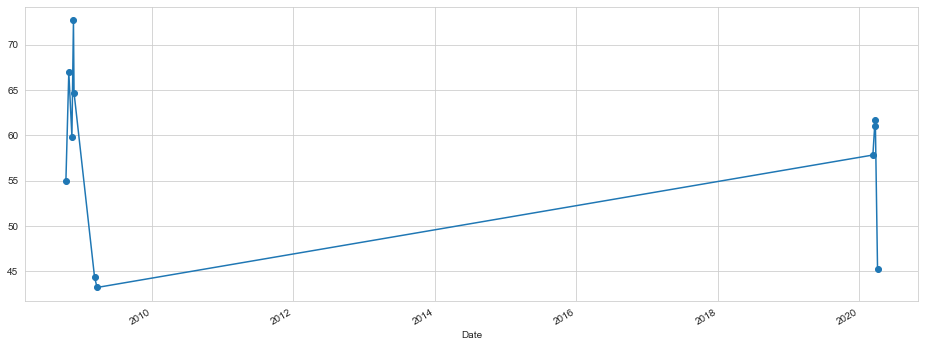

In [168]:
data[data["^GSPC daily returns"] * 100 > 6]["^VIX"].plot(marker = "o", figsize = (16,6 ))

In [169]:
data[data["^GSPC daily returns"] * 100 > 5.92][["^VIX", "^GSPC daily returns", "^VIX daily returns"]]

,^VIX,^GSPC daily returns,^VIX daily returns
Date,,,
2008-10-13,54.990002,0.115800,-0.213867
2008-10-28,66.959999,0.107890,-0.163627
2008-11-13,59.830002,0.069213,-0.099759
2008-11-21,72.669998,0.063248,-0.101286
2008-11-24,64.699997,0.064723,-0.109674
2009-03-10,44.369999,0.063663,-0.106884
2009-03-23,43.230000,0.070758,-0.057965
2020-03-13,57.830002,0.092871,-0.233735
2020-03-17,75.910004,0.059955,-0.081993


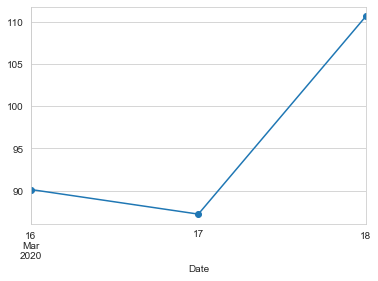

In [170]:
data.loc["2020-03-15":"2020-03-18"]["UVXY"].plot(marker = "o")

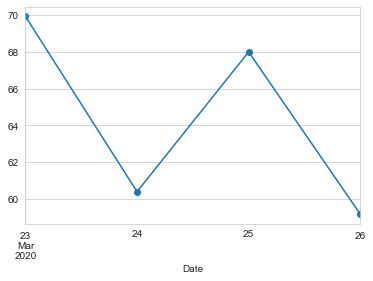

In [171]:
data.loc["2020-03-21":"2020-03-26"]["UVXY"].plot(marker = "o")

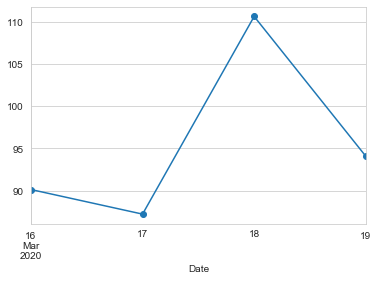

In [172]:
data.loc["2020-03-14":"2020-03-19"]["UVXY"].plot(marker = "o")

In [173]:
data[data["^VIX daily returns"] * 100 < -11.42][["^VIX", "^GSPC daily returns", "^VIX daily returns"]]

,^VIX,^GSPC daily returns,^VIX daily returns
Date,,,
2002-07-29,31.330000,0.054078,-0.117713
2002-10-01,34.119999,0.040023,-0.140338
2002-10-25,30.000000,0.017167,-0.118425
2002-12-20,26.709999,0.013017,-0.115856
2004-03-12,18.299999,0.012459,-0.114659
...,...,...,...
2020-03-02,33.419998,0.046039,-0.166791
2020-03-04,31.990000,0.042203,-0.131179
2020-03-10,47.299999,0.049396,-0.131473


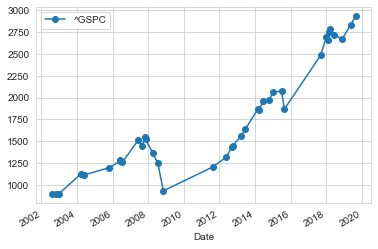

In [174]:
data[(data["^VIX daily returns"] * 100 < -11.42)& (data["^VIX daily returns"] * 100 > -12.42)][["^GSPC"]].plot(marker = "o")

In [175]:
data[(data["^VIX daily returns"] * 100 < -10.80)& (data["^VIX daily returns"] * 100 > -11.42)]

,^VIX,^GSPC,UVXY,^VIX daily returns,^GSPC daily returns,UVXY daily returns,^VIX normal returns,^GSPC normal returns,UVXY normal returns,^VIX allocation,^GSPC allocation,UVXY allocation,^VIX position,^GSPC position,UVXY position
Date,,,,,,,,,,,,,,,
2002-07-24,39.860001,843.429993,NaN,-0.112645,0.057327,NaN,1.755174,0.730451,NaN,0.526552,0.365226,NaN,78982.831342,54783.831782,NaN
2002-10-10,37.549999,803.919983,NaN,-0.108711,0.034966,NaN,1.653457,0.696234,NaN,0.496037,0.348117,NaN,74405.549704,52217.513596,NaN
2003-01-02,25.389999,909.030029,NaN,-0.112858,0.033200,NaN,1.118010,0.787264,NaN,0.335403,0.393632,NaN,50310.436750,59044.791674,NaN
2004-03-17,18.110001,1123.750000,NaN,-0.109636,0.011749,NaN,0.797446,0.973222,NaN,0.239234,0.486611,NaN,35885.075311,72991.631195,NaN
2005-10-28,14.250000,1198.410034,NaN,-0.110487,0.016549,NaN,0.627477,1.037881,NaN,0.188243,0.518940,NaN,28236.460848,77841.070733,NaN
2006-12-11,10.710000,1413.040039,NaN,-0.112676,0.002270,NaN,0.471598,1.223761,NaN,0.141480,0.611880,NaN,21221.929597,91782.066648,NaN
2007-02-13,10.340000,1444.260010,NaN,-0.109388,0.007597,NaN,0.455306,1.250799,NaN,0.136592,0.625399,NaN,20488.772595,93809.916781,NaN
2008-11-04,47.730000,1005.750000,NaN,-0.110842,0.040826,NaN,2.101717,0.871028,NaN,0.630515,0.435514,NaN,94577.281638,65327.103960,NaN
2008-11-24,64.699997,851.809998,NaN,-0.109674,0.064723,NaN,2.848965,0.737709,NaN,0.854690,0.368854,NaN,128203.433732,55328.143440,NaN


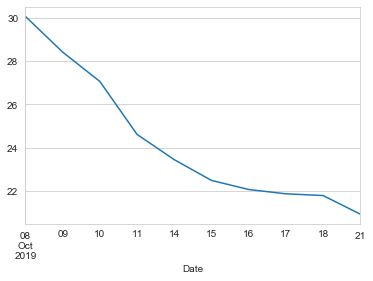

In [176]:
data.loc["2019-10-8":"2019-10-21"]["UVXY"].plot()